# Import Data and libraries

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import locale
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


warnings.filterwarnings('ignore')

df = pd.read_csv('C:/Users/Superuser/Desktop/Datasets/Warehouse_and_Retail_Sales.csv')

df.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

# Handling NaN

In [3]:
df['SUPPLIER'] = df['SUPPLIER'].fillna('ANON')
df['ITEM TYPE'] = df['ITEM TYPE'].fillna('ANON')


In [4]:
df.isnull().sum()

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        3
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

# Drop NaN in RETAIL SALES (3)

In [5]:
df.dropna(subset=['RETAIL SALES'], inplace=True)

In [6]:
df.isnull().sum()

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

#  WAREHOUSE SALES by MONTH 

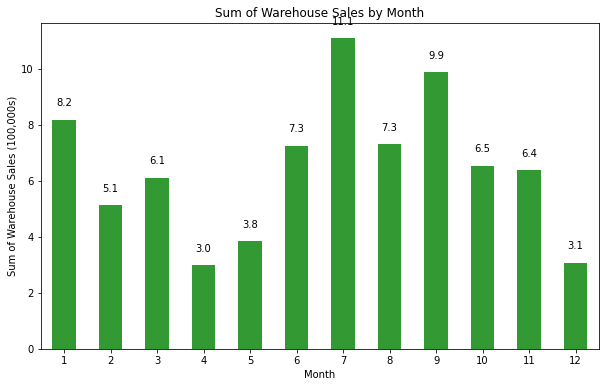

In [7]:
sum_sales = df.groupby('MONTH')['WAREHOUSE SALES'].sum()


plt.figure(figsize=(10, 6))
ax = sum_sales.plot(kind='bar', color='green', alpha=.8)
plt.title('Sum of Warehouse Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sum of Warehouse Sales (100,000s)')
plt.xticks(rotation=0)


formatter = ticker.FuncFormatter(lambda x, pos: f'{x/100000:.0f}')
ax.yaxis.set_major_formatter(formatter)


for i, v in enumerate(sum_sales):
    ax.text(i, v + 50000, f'{v/100000:.1f}', ha='center', fontsize=10, c='black')

plt.show()


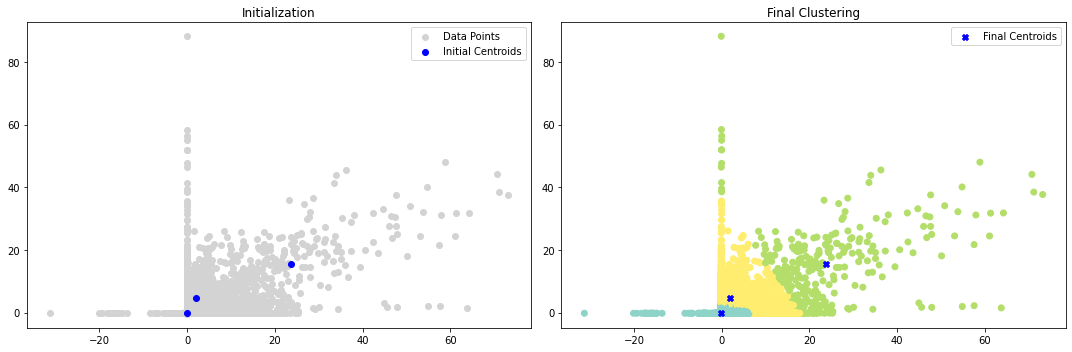

In [67]:
num_clusters = 3


data_for_clustering = df[['WAREHOUSE SALES', 'RETAIL SALES']]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)


kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(scaled_data)  


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


ax = axes[0]
ax.scatter(scaled_data[:, 0], scaled_data[:, 1], c='lightgray', label='Data Points')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='blue', marker='o', label='Initial Centroids')
ax.set_title('Initialization')
ax.legend()


cluster_assignments = kmeans.predict(scaled_data)
centroids = kmeans.cluster_centers_


ax = axes[1]
ax.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_assignments, cmap='Set3')
ax.scatter(centroids[:, 0], centroids[:, 1], c='blue', marker='X', label='Final Centroids')
ax.set_title('Final Clustering')
ax.legend()


plt.tight_layout()
plt.show()


# K-Means Total_data
## 3 Clusters

Silhouette Score: 0.9335401121231


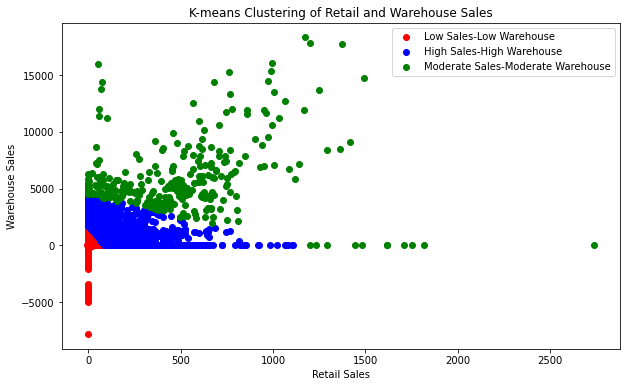

Cluster
0    302880
2      4465
1       297
Name: count, dtype: int64


In [19]:
features = ['RETAIL SALES', 'WAREHOUSE SALES']


data = df[features]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


num_clusters = 3


kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_assignments = kmeans.fit_predict(scaled_data)

silhouette_avg = silhouette_score(scaled_data, cluster_assignments)
print(f"Silhouette Score: {silhouette_avg}")

df['Cluster'] = cluster_assignments

cluster_names = {
    0: 'Low Sales',
    1: 'Moderate Sales',
    2: 'High Sales'
}

plt.figure(figsize=(10, 6))
unique_clusters = df['Cluster'].unique()
colors = ['red', 'blue', 'green']
for cluster_id, color in zip(unique_clusters, colors):
    clustered_data = df[df['Cluster'] == cluster_id]
    cluster_label = cluster_names.get(cluster_id, f'Cluster {cluster_id}')
    plt.scatter(clustered_data['RETAIL SALES'], clustered_data['WAREHOUSE SALES'], color=color, label=cluster_label)
    
plt.title('K-means Clustering of Retail and Warehouse Sales')
plt.xlabel('Retail Sales')
plt.ylabel('Warehouse Sales')
plt.legend()
plt.show()

print(df['Cluster'].value_counts())


## 2 Clusters

Silhouette Score: 0.9802709806121318


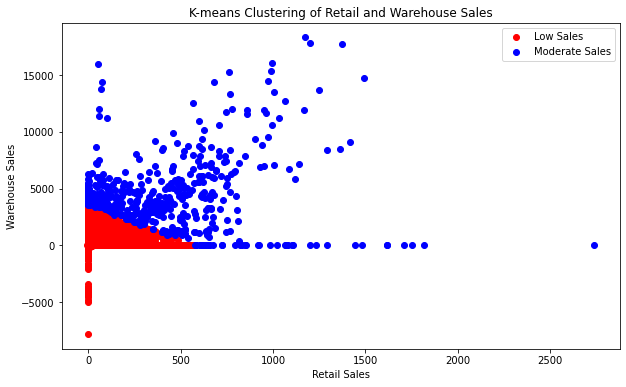

Cluster
0    307135
1       507
Name: count, dtype: int64


In [39]:
features = ['RETAIL SALES', 'WAREHOUSE SALES']


data = df[features]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


num_clusters = 2


kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_assignments = kmeans.fit_predict(scaled_data)

silhouette_avg = silhouette_score(scaled_data, cluster_assignments)
print(f"Silhouette Score: {silhouette_avg}")

df['Cluster'] = cluster_assignments

cluster_names = {
    0: 'Low Sales',
    1: 'Moderate Sales',
    2: 'High Sales'
}

plt.figure(figsize=(10, 6))
unique_clusters = df['Cluster'].unique()
colors = ['red', 'blue', 'green']
for cluster_id, color in zip(unique_clusters, colors):
    clustered_data = df[df['Cluster'] == cluster_id]
    cluster_label = cluster_names.get(cluster_id, f'Cluster {cluster_id}')
    plt.scatter(clustered_data['RETAIL SALES'], clustered_data['WAREHOUSE SALES'], color=color, label=cluster_label)
    
plt.title('K-means Clustering of Retail and Warehouse Sales')
plt.xlabel('Retail Sales')
plt.ylabel('Warehouse Sales')
plt.legend()
plt.show()

print(df['Cluster'].value_counts())


## 5 Clusters

Silhouette Score: 0.9054528514141293


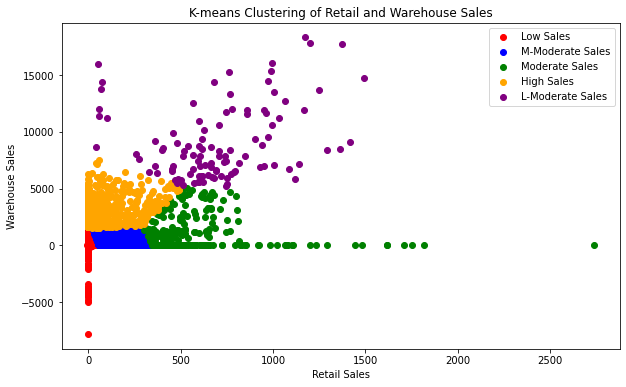

Cluster
0    299434
2      7179
4       629
3       293
1       107
Name: count, dtype: int64


In [43]:
features = ['RETAIL SALES', 'WAREHOUSE SALES']


data = df[features]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


num_clusters = 5


kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_assignments = kmeans.fit_predict(scaled_data)

silhouette_avg = silhouette_score(scaled_data, cluster_assignments)
print(f"Silhouette Score: {silhouette_avg}")

df['Cluster'] = cluster_assignments

cluster_names = {
    0: 'Low Sales',
    1: 'L-Moderate Sales',
    2: 'M-Moderate Sales',
    3: 'Moderate Sales',
    4: 'High Sales'

}

plt.figure(figsize=(10, 6))
unique_clusters = df['Cluster'].unique()
colors = ['red', 'blue', 'green', 'orange', 'purple']
for cluster_id, color in zip(unique_clusters, colors):
    clustered_data = df[df['Cluster'] == cluster_id]
    cluster_label = cluster_names.get(cluster_id, f'Cluster {cluster_id}')
    plt.scatter(clustered_data['RETAIL SALES'], clustered_data['WAREHOUSE SALES'], color=color, label=cluster_label)
    
plt.title('K-means Clustering of Retail and Warehouse Sales')
plt.xlabel('Retail Sales')
plt.ylabel('Warehouse Sales')
plt.legend()
plt.show()

print(df['Cluster'].value_counts())


# K-Means by months
## 3 Clusters

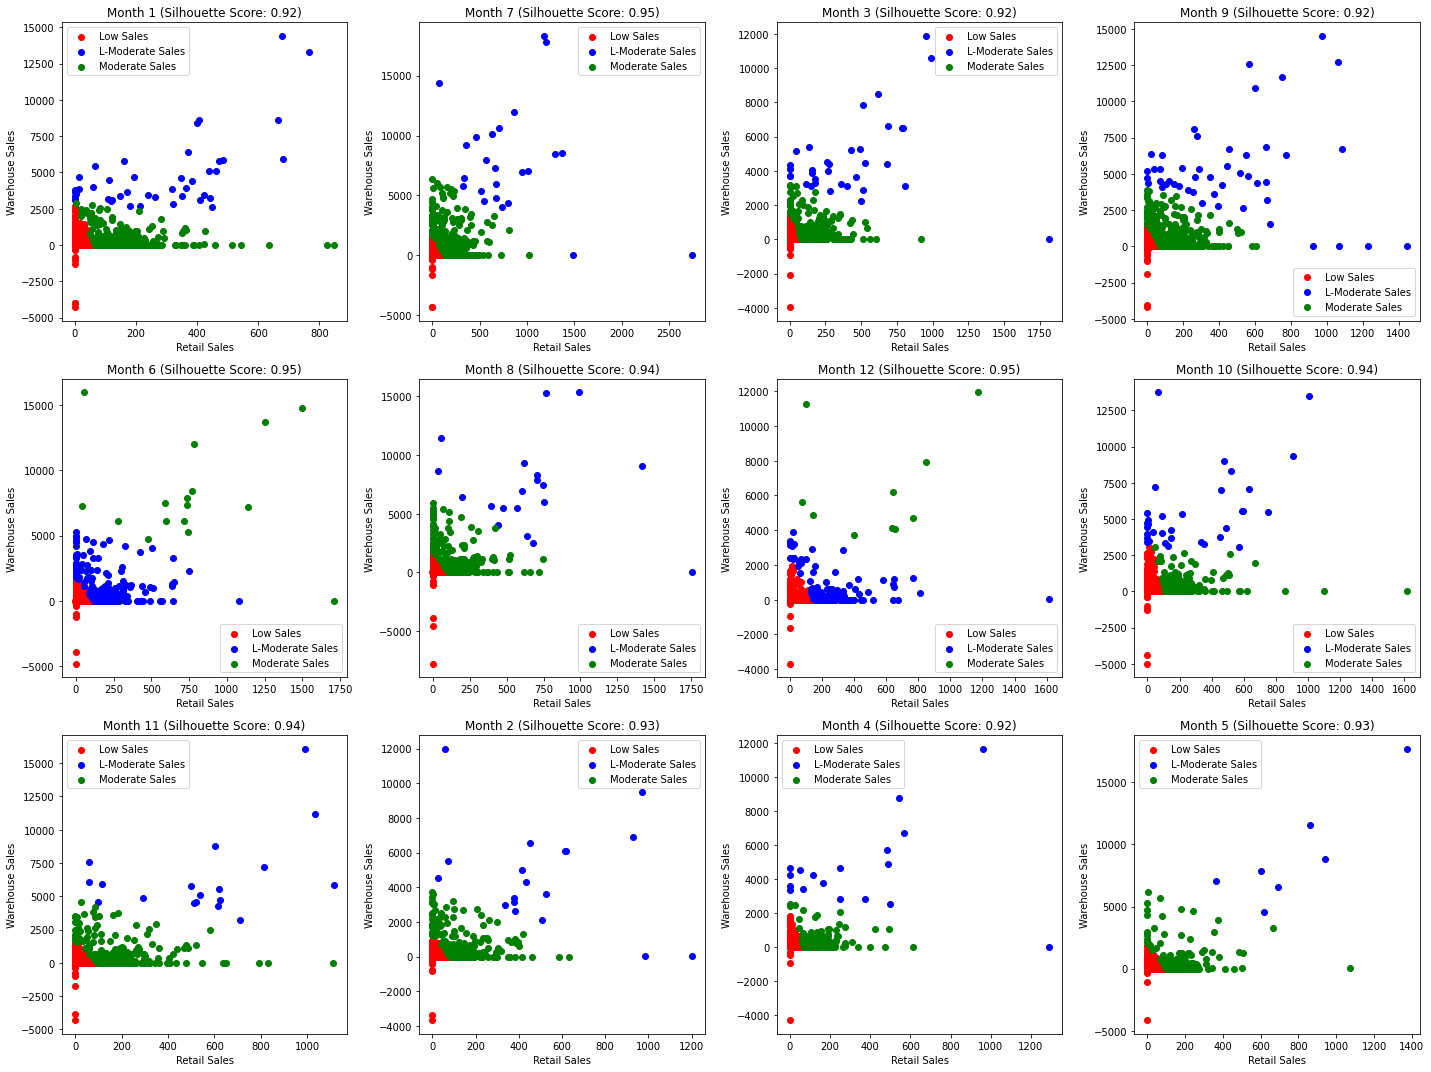

In [27]:
data_for_clustering = df[['WAREHOUSE SALES', 'RETAIL SALES']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

num_clusters = 3

unique_months = df['MONTH'].unique()


cluster_info = {
    0: {'name': 'Low Sales', 'color': 'red'},
    1: {'name': 'Moderate Sales', 'color': 'blue'},
    2: {'name': 'High Sales', 'color': 'green'},
}

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, month in enumerate(unique_months):
    filtered_data = df[df['MONTH'] == month]
    
    data_for_clustering = filtered_data[['WAREHOUSE SALES', 'RETAIL SALES']]
    

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_clustering)
    
    
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    filtered_data['Cluster'] = kmeans.fit_predict(scaled_data)
    
    
    silhouette_avg = silhouette_score(scaled_data, filtered_data['Cluster'])
    
    
    ax = axes[i]
    
    
    colors = ['red', 'blue', 'green']
    for cluster_id, color in enumerate(colors):
        clustered_data = filtered_data[filtered_data['Cluster'] == cluster_id]
        ax.scatter(clustered_data['RETAIL SALES'], clustered_data['WAREHOUSE SALES'], color=color, label=cluster_names[cluster_id])
    
    ax.set_title(f'Month {month} (Silhouette Score: {silhouette_avg:.2f})')
    ax.set_xlabel('Retail Sales')
    ax.set_ylabel('Warehouse Sales')
    ax.legend()


plt.tight_layout()
plt.show()


## 2 Clusters

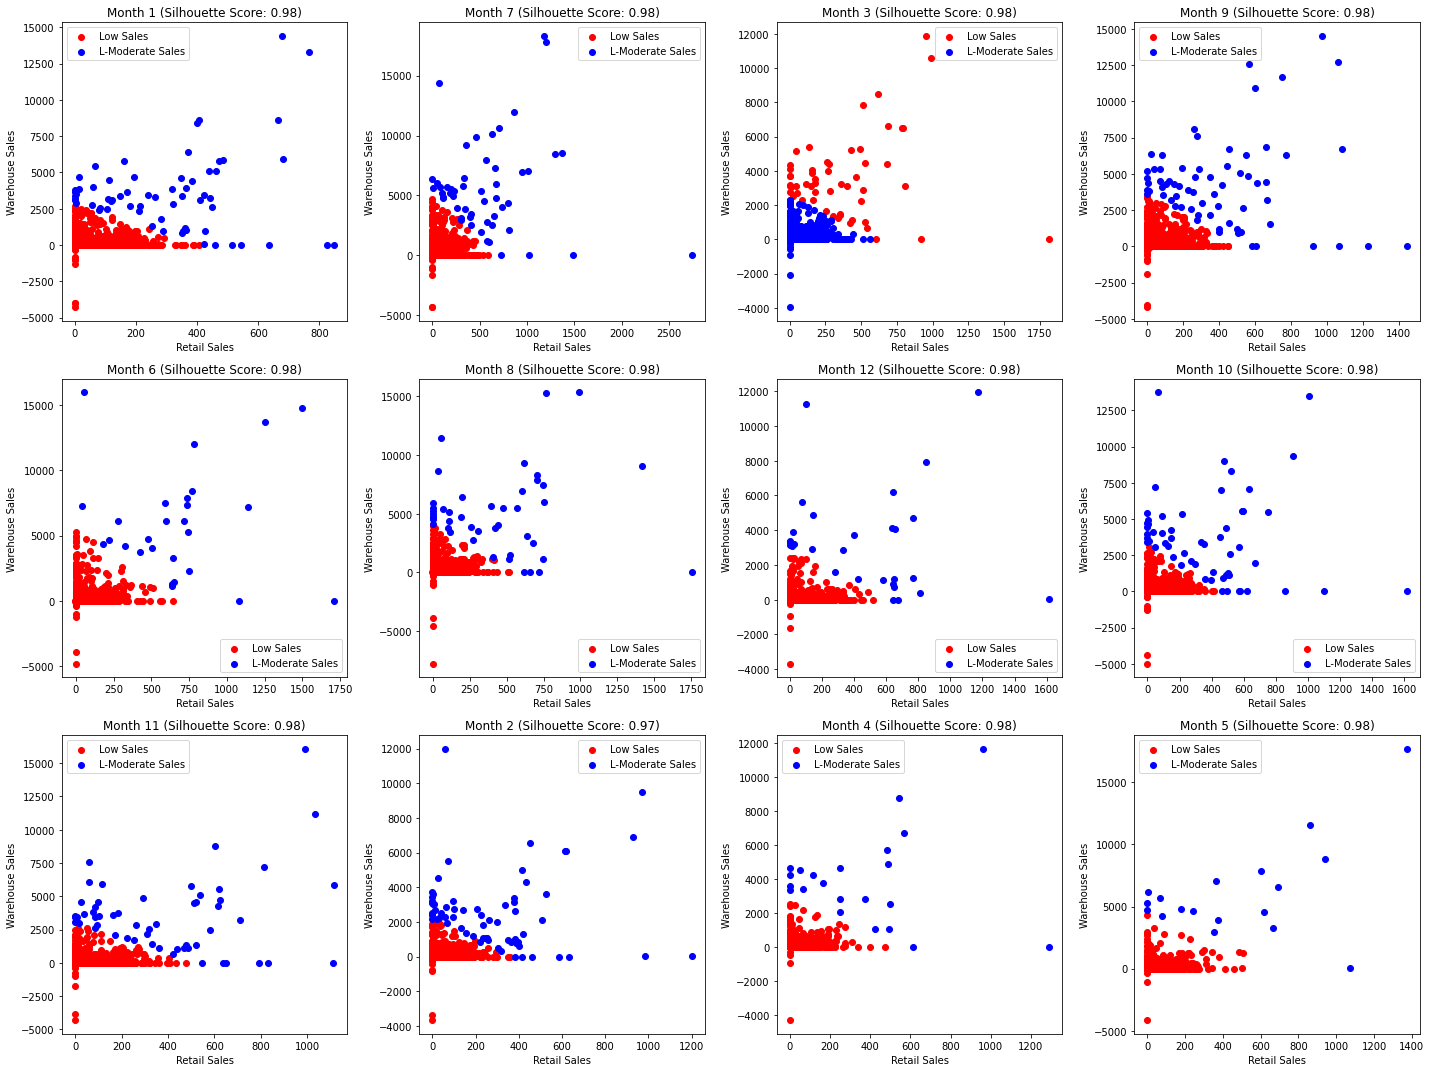

In [42]:
data_for_clustering = df[['WAREHOUSE SALES', 'RETAIL SALES']]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)


num_clusters = 2


unique_months = df['MONTH'].unique()


cluster_info = {
    0: {'name': 'Low Sales', 'color': 'red'},
    1: {'name': 'High Sales', 'color': 'blue'}
}


fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()


for i, month in enumerate(unique_months):
    
    filtered_data = df[df['MONTH'] == month]
    
    
    data_for_clustering = filtered_data[['WAREHOUSE SALES', 'RETAIL SALES']]
    
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_clustering)
    
    
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    filtered_data['Cluster'] = kmeans.fit_predict(scaled_data)
    
    
    silhouette_avg = silhouette_score(scaled_data, filtered_data['Cluster'])
    
    
    ax = axes[i]
    
    
    colors = ['red', 'blue']
    for cluster_id, color in enumerate(colors):
        clustered_data = filtered_data[filtered_data['Cluster'] == cluster_id]
        cluster_label = cluster_names.get(cluster_id, f'Cluster {cluster_id}')
        ax.scatter(clustered_data['RETAIL SALES'], clustered_data['WAREHOUSE SALES'], color=color, label=cluster_label)
    
    ax.set_title(f'Month {month} (Silhouette Score: {silhouette_avg:.2f})')
    ax.set_xlabel('Retail Sales')
    ax.set_ylabel('Warehouse Sales')
    ax.legend()


plt.tight_layout()
plt.show()


# 5-Clusters

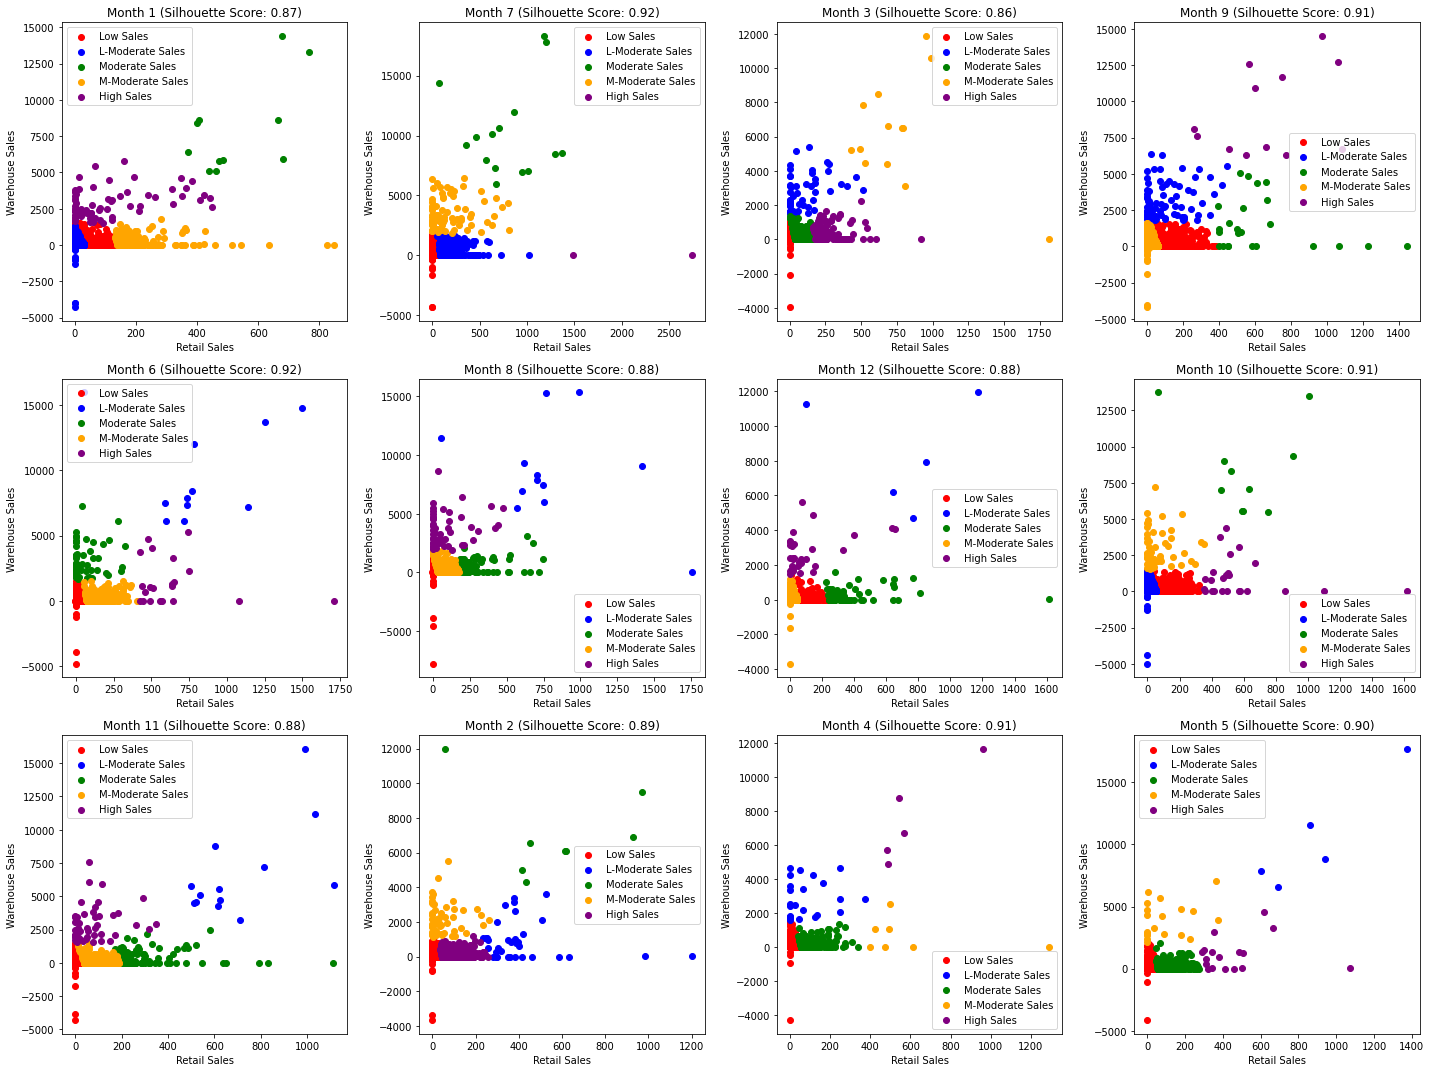

In [40]:
num_clusters = 5

unique_months = df['MONTH'].unique()


fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()


for i, month in enumerate(unique_months):
    
    filtered_data = df[df['MONTH'] == month]
    
    
    data_for_clustering = filtered_data[['WAREHOUSE SALES', 'RETAIL SALES']]
    
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_clustering)
    
    
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    filtered_data['Cluster'] = kmeans.fit_predict(scaled_data)
    
    
    silhouette_avg = silhouette_score(scaled_data, filtered_data['Cluster'])
    
    
    ax = axes[i]
    
    
    cluster_info = {
        0: {'name': 'Low Sales', 'color': 'red'},
        1: {'name': 'L-Moderate Sales', 'color': 'blue'},
        2: {'name': 'Moderate Sales', 'color': 'green'},
        3: {'name': 'M-Moderate Sales', 'color': 'orange'},
        4: {'name': 'High Sales', 'color': 'purple'}
    }
    
    
    for cluster_id, cluster_info in cluster_info.items():
        clustered_data = filtered_data[filtered_data['Cluster'] == cluster_id]
        cluster_label = cluster_info['name']
        cluster_color = cluster_info['color']
        ax.scatter(clustered_data['RETAIL SALES'], clustered_data['WAREHOUSE SALES'], color=cluster_color, label=cluster_label)
    
    ax.set_title(f'Month {month} (Silhouette Score: {silhouette_avg:.2f})')
    ax.set_xlabel('Retail Sales')
    ax.set_ylabel('Warehouse Sales')
    ax.legend()


plt.tight_layout()
plt.show()
